In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statistics 

### 1. Загрузить файл hr.csv

In [2]:
hr = pd.read_csv ("HR.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

In [3]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
import pandas_profiling
pandas_profiling.ProfileReport(hr)

### 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

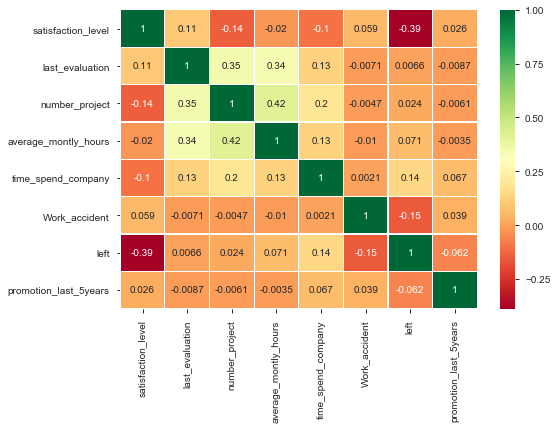

In [6]:
sns.heatmap(hr.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными.

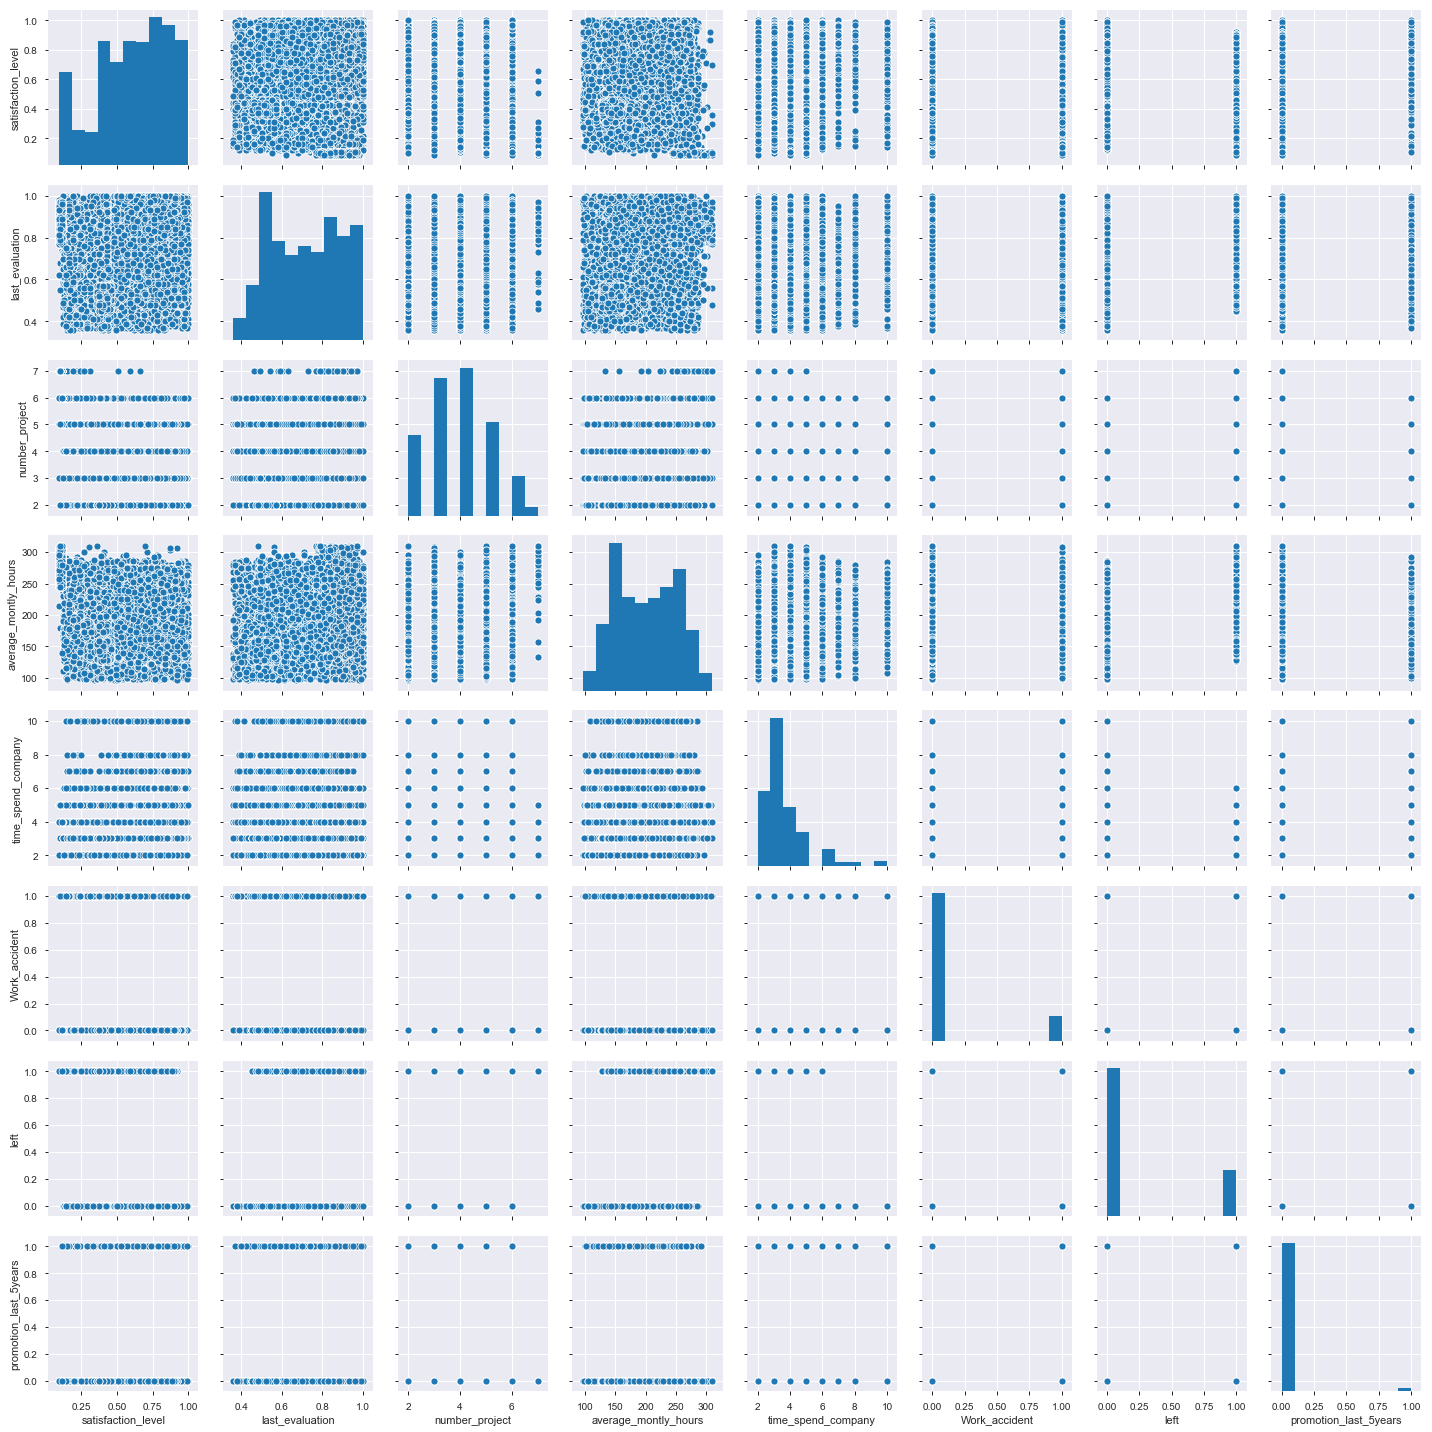

In [7]:
sns.pairplot(hr)
plt.show()

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

<b>1) Гипотеза 0</b> - уровень удовлетворенности у сотрудников с числом проектов больше и меньше 4 не различается

In [8]:
many_projects = hr[hr['number_project']>4]['satisfaction_level']
less_projects = hr[hr['number_project']<=4]['satisfaction_level']
stats.ttest_ind(many_projects,less_projects)

Ttest_indResult(statistic=-25.61207762549115, pvalue=1.2176715204294854e-141)

In [9]:
u, p_value = stats.mannwhitneyu(many_projects,less_projects)
print("two-sample wilcoxon-test", p_value)

two-sample wilcoxon-test 4.017238526572066e-62


В обоих случаях p_value существенно меньше 0.05, гипотезу отклоняем. 

<b>2) Гипотеза 0</b> - у уволенных сотрудников уровень удовлетворенности не отличается от уровня удовлетворенности продолжающих работать

In [10]:
uvolen = hr[hr['left']==1]['satisfaction_level']
rabotaet = hr[hr['left']==0]['satisfaction_level']
stats.ttest_ind(uvolen,rabotaet)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

Значение p_value существенно меньше 0.05, гипотезу отклоняем. 

<b>3) Гипотеза 0</b> - уровень удовлетворенности у сотрудников с разным уровнем зарплат не различается.

In [11]:
low = hr[hr['salary']=='low']['satisfaction_level']
medium = hr[hr['salary']=='medium']['satisfaction_level']
high = hr[hr['salary']=='high']['satisfaction_level']
stats.f_oneway(low, medium, high)

F_onewayResult(statistic=18.960895741998826, pvalue=5.967355425747657e-09)

Значение p_value существенно меньше 0.05, гипотезу отклоняем. 

<b>4) Гипотеза 0</b> - уровень зарплаты в sales не зависит от количества проектов.

In [12]:
low_ = hr[(hr['salary']=='low') & (hr['sales']=='sales')]['number_project']
high_ = hr[(hr['salary']=='high') & (hr['sales']=='sales')]['number_project']
stats.ttest_ind(low_,high_)

Ttest_indResult(statistic=-1.2112468701525125, pvalue=0.22592176883239107)

Значение p_value превышает 0.05, гипотезу принимаем.


### 6. Рассчитать сколько работников работает в каждом департаменте.

In [13]:
hr['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

### 7. Показать распределение сотрудников по зарплатам.

In [14]:
hr['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

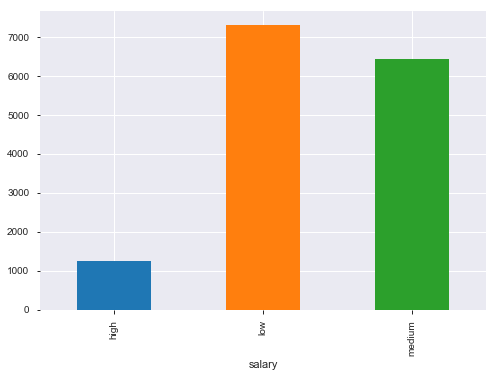

In [15]:
df = hr.groupby('salary').count()['sales']
df.plot (kind ='bar')
plt.show()

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

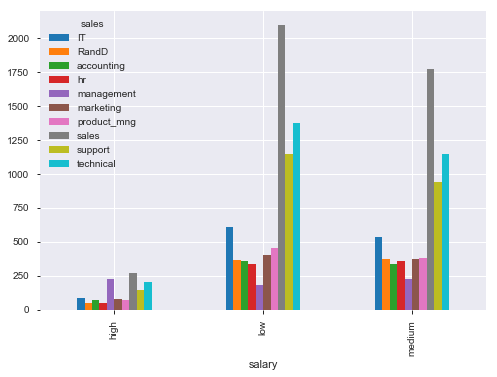

In [16]:
df1 = hr.groupby(['salary', 'sales']).count()['left']
df1.unstack().plot (kind ='bar')
plt.show()

### 9. Сколько сотрудников покинули компанию.

In [17]:
print (len(hr[hr['left']==1]),' сотрудников покинули компанию')

3571  сотрудников покинули компанию


### <br>10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [21]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [40]:
data = hr[['satisfaction_level','number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
          'promotion_last_5years', 'salary']]
data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,2,157,3,0,1,0,low
1,0.80,5,262,6,0,1,0,medium
2,0.11,7,272,4,0,1,0,medium
3,0.72,5,223,5,0,1,0,low
4,0.37,2,159,3,0,1,0,low


In [41]:
data = pd.get_dummies(data, ['salary'])
data.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,2,157,3,0,1,0,0,1,0
1,0.80,5,262,6,0,1,0,0,0,1
2,0.11,7,272,4,0,1,0,0,0,1
3,0.72,5,223,5,0,1,0,0,1,0
4,0.37,2,159,3,0,1,0,0,1,0


In [42]:
X, y = data [['satisfaction_level','number_project','average_montly_hours', 'time_spend_company', 'Work_accident', 
         'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium']], data ['left']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [46]:
X_train.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.798158,-0.641859,0.834510,0.330050,-0.408112,-0.147313,3.331009,-0.985532,-0.859044
1,-2.046996,1.770627,1.773560,0.330050,-0.408112,-0.147313,-0.300209,1.014681,-0.859044
2,0.517650,-0.641859,0.374975,-1.019586,-0.408112,-0.147313,3.331009,-0.985532,-0.859044
3,0.758085,-0.641859,0.275076,1.679686,-0.408112,-0.147313,-0.300209,1.014681,-0.859044
4,1.279029,-0.641859,-0.344298,-0.344768,-0.408112,-0.147313,-0.300209,-0.985532,1.164084


In [47]:
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
importances = forest.feature_importances_
importances

array([5.31726282e-01, 1.19011411e-01, 1.68294987e-01, 1.68762170e-01,
       2.68721251e-03, 1.01061763e-04, 1.43927587e-03, 4.33247023e-03,
       3.64513094e-03])

In [53]:
impact = pd.DataFrame(importances, index = np.array(X.columns),columns=['importance'])
impact

,importance
satisfaction_level,0.531726
number_project,0.119011
average_montly_hours,0.168295
time_spend_company,0.168762
Work_accident,0.002687
promotion_last_5years,0.000101
salary_high,0.001439
salary_low,0.004332
salary_medium,0.003645


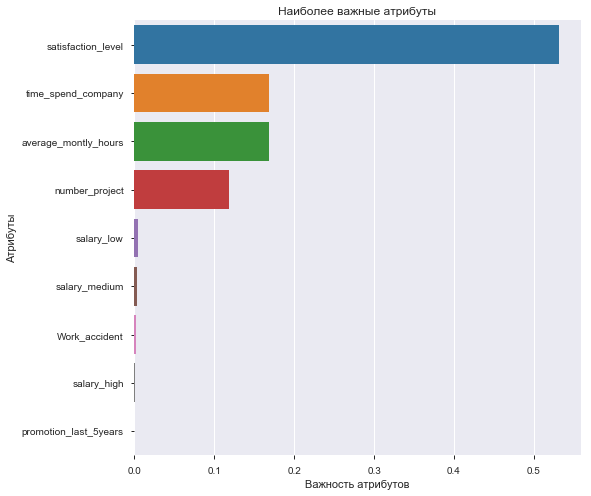

In [62]:
headers = list(X_train.columns.values)
feature_importance = pd.Series(forest.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [61]:
forest.score(X_test, y_test)

0.91781872605184

Из полученной модели можно сделать вывод, что наибольшее влияние на факт увольнения имеют <b>satisfaction_level, number_project, average_montly_hours, time_spend_company</b>.<br> 
С учетом значений в матрице корреляций, вероятность увольнения сотрудника выше, чем ниже satisfaction_level, и чем выше number_project, average_montly_hours, time_spend_company<br> 
Влияние остальных параметров малозначительно.<br> 
Точность предсказаний модели 91%.